Importamos el dataset de IRIS

In [ ]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Vamos a renombrar las columnas para poder hacer un análisis rápido del dataset

In [ ]:
df =df.rename({0:'Largo Sepalo', 1:'Ancho Sepalo', 2:'Largo Petalo', 3:'Ancho Petalo',4:'Clase'}, axis='columns')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Largo Sepalo  150 non-null    float64
 1   Ancho Sepalo  150 non-null    float64
 2   Largo Petalo  150 non-null    float64
 3   Ancho Petalo  150 non-null    float64
 4   Clase         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df['Clase'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Clase, dtype: int64

In [ ]:
df[df['Clase']=='Iris-setosa'].describe()

,Largo Sepalo,Ancho Sepalo,Largo Petalo,Ancho Petalo
count,50.00000,50.000000,50.000000,50.00000
mean,5.00600,3.418000,1.464000,0.24400
std,0.35249,0.381024,0.173511,0.10721
min,4.30000,2.300000,1.000000,0.10000
25%,4.80000,3.125000,1.400000,0.20000
50%,5.00000,3.400000,1.500000,0.20000
75%,5.20000,3.675000,1.575000,0.30000
max,5.80000,4.400000,1.900000,0.60000


In [ ]:
df[df['Clase']=='Iris-versicolor'].describe()

,Largo Sepalo,Ancho Sepalo,Largo Petalo,Ancho Petalo
count,50.000000,50.000000,50.000000,50.000000
mean,5.936000,2.770000,4.260000,1.326000
std,0.516171,0.313798,0.469911,0.197753
min,4.900000,2.000000,3.000000,1.000000
25%,5.600000,2.525000,4.000000,1.200000
50%,5.900000,2.800000,4.350000,1.300000
75%,6.300000,3.000000,4.600000,1.500000
max,7.000000,3.400000,5.100000,1.800000


Vamos a plotear el dataset para ver como se distribuyen los ejemplos. Utilizaremos solo dos dimensiones para poder graficar.

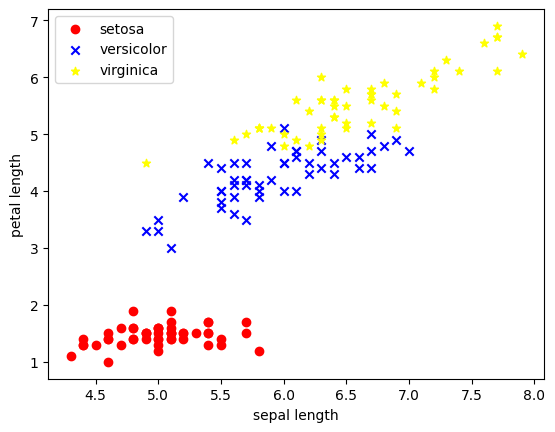

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

X = df.iloc[0:150, [0, 2]].values
plt.scatter(X[:50, 0], X[:50, 1],color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='versicolor')
plt.scatter(X[100:150, 0], X[100:150, 1], color='yellow', marker='*', label='virginica')
plt.xlabel('sepal length')
plt.ylabel('petal length')
plt.legend(loc='upper left')
plt.show()

Nos quedamos solo con las dos primeras clases (Observaciones desde la 1 a la 100) ya que son son linealmente separables, mientras que la tercera clase (Virginica) no es linealmente separable de la segunda clase (Versicolor).

In [ ]:
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)
X = df.iloc[0:100, [0, 2]].values

A modo de ejemplo, vemos como se construye de manera elemental el algoritmo Perceptron.

In [ ]:
import numpy as np
class Perceptron(object):   # Primero declaramos la clase Perceptron el cual hereda las particularidades de la clase objeto
    """Perceptron classifier.
        Parameters
        ------------
        eta : float
          Learning rate (between 0.0 and 1.0)
        n_iter : int
          Passes over the training dataset.
        Attributes
        -----------
        w_ : 1d-array
          Weights after fitting.
        errors_ : list
          Number of misclassifications in every epoch.
    """
    #Variables de nuestra clase (atributos)
    def __init__(self, eta=0.01, n_iter=10):
      #The __init__  function is called every time an object is created from a class
      #The __init__ method lets the class initialize the object’s attributes and serves no other purpose. It is only used within classes.
      self.eta = eta
      self.n_iter = n_iter
    def fit(self, X, y):
        """Fit training data.
        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
        Training vectors, where n_samples
            is the number of samples and n_features is the number of features.
        y : array-like, shape = [n_samples]
        Target values.
        Returns
        -------
        self : object
        """
        self.w_ = np.zeros(1 + X.shape[1])  # Genera los w iniciales, el cual tiene una dimensión de 1 + n_features, es decir,  X.shape[1]
        self.errors_ = []   #Lista de errores vacía para almacenar los errores del perceptrón durante el ajuste
        for _ in range(self.n_iter): # Realiza el ajuste del perceptrón en un número dado de iteraciones (10 en este caso)
          errors = 0 #Inicializa la variable "errors" para contar el número de errores de clasificación en cada iteración
          for xi, target in zip(X, y):  # Itera en cada muestra de entrenamiento (xi) y su correspondiente valor objetivo (target)
            update = self.eta * (target - self.predict(xi))
            #Calcula la actualización de los pesos del perceptrón para esta muestra de entrenamiento.
            #La actualización se basa en la diferencia entre el valor objetivo y la predicción actual del perceptrón para esta muestra, multiplicada por una tasa de aprendizaje "eta".
            self.w_[1:] += update * xi
            self.w_[0] += update
            # Actualiza los pesos del perceptrón con la actualización calculada.
            # La primera posición del vector de pesos se actualiza con la actualización directamente,
            # mientras que el resto se actualiza multiplicando cada característica por la actualización correspondiente.
            errors += int(update != 0.0)
            # Actualiza la variable "errors" si se produce un error de clasificación para esta muestra. Esto se hace agregando 1 al contador de errores si la actualización no es cero.
          self.errors_.append(errors)
          # Agrega el número de errores para esta iteración a la lista de errores.
        return self  #Devuelve el objeto perceptrón ajustado

    def net_input(self, X):
      """Calculate net input"""
      #Este método se utiliza para calcular la entrada neta del perceptrón a partir de un conjunto de características dado.
      return np.dot(X, self.w_[1:]) + self.w_[0]
      #Calcula la entrada neta del perceptrón multiplicando la matriz de características X por el vector de pesos del perceptrón
      #El resultado se calcula utilizando la función de producto punto (dot product) de NumPy.
    def predict(self, X):
      """Return class label after unit step"""   #Devuelve la etiqueta que necesitamos obtener
      return np.where(self.net_input(X) >= 0.0, 1, -1)
      # net_input calcula la entrada neta del perceptrón para la matriz de características X

In [ ]:
ppn = Perceptron() #Una variable va a tener el Perceptron

In [ ]:
ppn.fit(X,y)   #Las variables que se necesitan es ella misma, X, y

In [ ]:
ppn.predict(X)

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

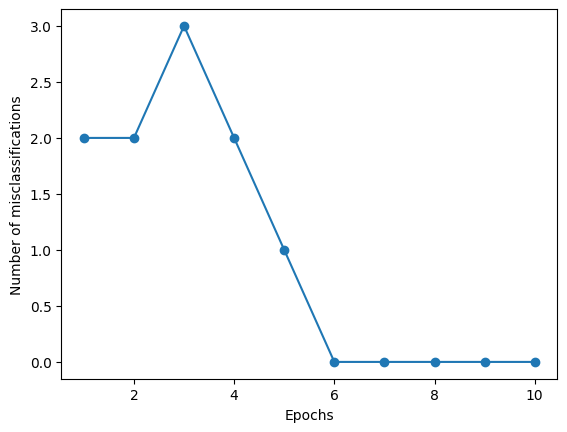

In [ ]:
ppn = Perceptron(eta=0.1, n_iter=10)  # Recordar que se puede evitar poner eta y n_iter ya que los valores ya están definidos (solo poner cuando querramos nuevos valores)
ppn.fit(X, y)
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_,marker='o')
plt.xlabel('Epochs') #Iteraciones o épocas n_iter
plt.ylabel('Number of misclassifications')
plt.show()
# A la sexta vez dejó de tener errores

In [ ]:
from sklearn.linear_model import Perceptron # Usando el modelo Perceptron de sklearn

In [ ]:
alg = Perceptron(eta0=0.1, max_iter=10, verbose=True)

In [ ]:
alg.fit(X,y)

-- Epoch 1
Norm: 1.20, NNZs: 2, Bias: -0.200000, T: 100, Avg. loss: 0.170930
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 1.20, NNZs: 2, Bias: -0.200000, T: 200, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 1.20, NNZs: 2, Bias: -0.200000, T: 300, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 1.20, NNZs: 2, Bias: -0.200000, T: 400, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 1.20, NNZs: 2, Bias: -0.200000, T: 500, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 1.20, NNZs: 2, Bias: -0.200000, T: 600, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 1.20, NNZs: 2, Bias: -0.200000, T: 700, Avg. loss: 0.000000
Total training time: 0.00 seconds.
Convergence after 7 epochs took 0.00 seconds


Perceptron(eta0=0.1, max_iter=10, verbose=True)

In [ ]:
alg.predict(X)

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [ ]:
from matplotlib.colors import ListedColormap
# Traza regiones de decisión para un clasificador binario
# ListedColormap crea mapas de colores personalizados
def plot_decision_regions(X, y, classifier, resolution=0.02):
  # classifier es un clasificador entrenado
  # resolution es un valor de resolución opcional para la malla de puntos
# setup marker generator and color map
  markers = ('s', 'x', 'o', '^', 'v')
  colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
  cmap = ListedColormap(colors[:len(np.unique(y))])
  # ListedColormap recibe la cantidad de colores que corresponden a la cantidad de clases únicas en la matriz 'y' (en este caso 2)
  # plot the decision surface
  x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  # x1_min, x1_max, x2_min, x2_max calculan los límites del gráfico en cada dimensión de la matrix 'X'
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
  np.arange(x2_min, x2_max, resolution))
  # xx1, xx2 crean una malla de puntos utilizando np.meshgrid() a partir de los límites calculados y el valor de resolución proporcionado
  Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
  Z = Z.reshape(xx1.shape)
  # Se usa classifier para predecir las etiquetas de clase de los puntos en la malla de puntos
  # Z es la matriz resultante que contiene las etiquetas de clase predichas para cada punto en la malla de puntos
  #Se pide con reshape() que Z tenga la misma forma que xx1
  plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())
  #Trazar la región de decisión y la rellenan con los colores del mapa de colores personalizado.
  # ylim y xlim establecen los límites del gráfico en cada dimensión
  # plot class samples
  for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl)
    #Trazar las muestras de clase como puntos en el gráfico

<ipython-input-21-de25fff30539>:19: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl)


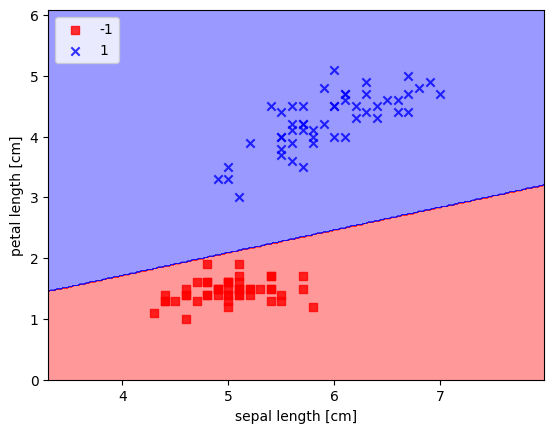

In [ ]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

<ipython-input-21-de25fff30539>:19: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl)


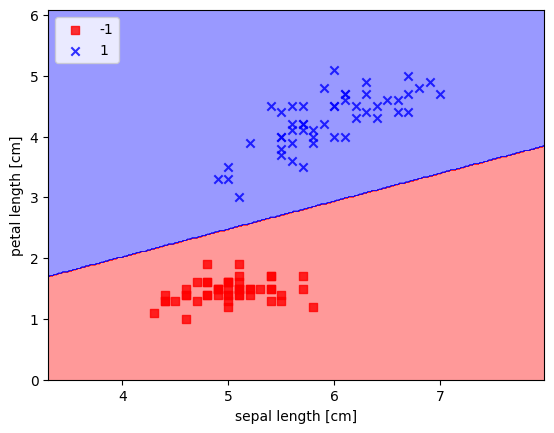

In [ ]:
plot_decision_regions(X, y, classifier=alg)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()